Spark session created successfully!
Generating student profiles...
Generated 10000 student profiles
Generating marks data...
Generated marks for 10000 students
Joined student profiles with their marks

Sample of the data:
+---------+-----------------+--------------------+------+--------------------+----+-----------+-----------+--------+------------+-----------+---+
|StudentID|             Name|               Email|Gender|          Department|Year|Electronics|Programming|Database|Data_Science|Mathematics|DSA|
+---------+-----------------+--------------------+------+--------------------+----+-----------+-----------+--------+------------+-----------+---+
|   S00023|William Hernandez|william.hernandez...| Other|   Civil Engineering|   2|         24|         83|      59|           6|         34| 83|
|   S00209|   William Thomas|william.thomas@un...|  Male|    Computer Science|   1|         67|         15|      30|          20|          8| 55|
|   S00249|   Oliver Jackson|oliver.jackson@un..


--- Top 10 Performers ---


,StudentID,Name,Department,Average_Marks,Grade
0,S02773,David Miller,Mathematics,90.833333,A
1,S00602,Amelia Jackson,Computer Science,89.666667,A
2,S09989,Sophia Clark,Information Technology,89.500000,A
3,S09682,Elizabeth Martin,Information Technology,88.833333,A
4,S03779,Mia Jones,Mechanical Engineering,88.666667,A
5,S02458,Barbara Johnson,Mathematics,88.500000,A
6,S03956,Noah Hernandez,Physics,87.666667,A
7,S08016,Liam Miller,Electrical Engineering,87.500000,A
8,S06286,Mary Williams,Electrical Engineering,87.333333,A
9,S09426,Charles Harris,Civil Engineering,87.166667,A



--- Subject-wise Statistics ---


,Subject,Average,Min,Max,StdDev
0,Electronics,54.6240,0,100,28.293354
1,Programming,54.7273,0,100,28.055261
2,Database,54.8552,0,100,28.368978
3,Data_Science,55.0003,0,100,27.894765
4,Mathematics,54.3159,0,100,28.221650
5,DSA,55.2292,0,100,28.263088



--- Department Performance ---


,Department,Avg_Total
6,Civil Engineering,330.601064
5,Computer Science,329.045039
0,Information Technology,328.876987
4,Mechanical Engineering,328.815753
2,Mathematics,328.773544
3,Physics,328.387120
1,Electrical Engineering,326.562317



Generating subject correlation heatmap...


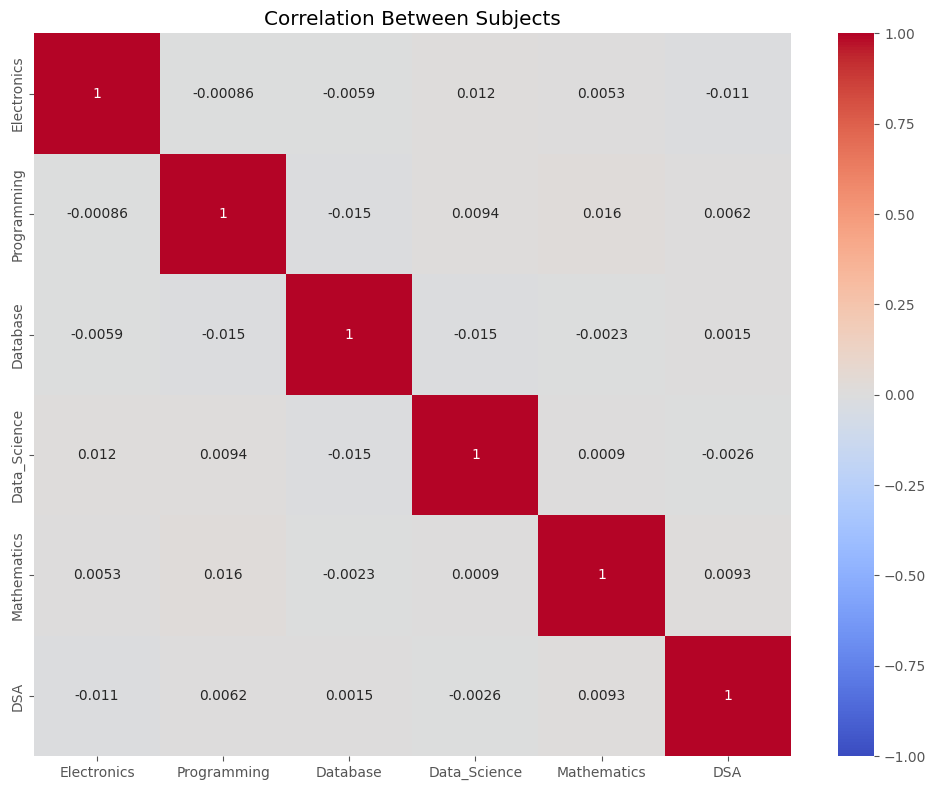


Generating sample report card:

               STUDENT REPORT CARD                
Student ID: S00001
Name: Joseph Rodriguez
Department: Civil Engineering
Year: 4
--------------------------------------------------
                  SUBJECT MARKS                   
--------------------------------------------------
Electronics: 72 (PASS)
Programming: 22 (FAIL)
Database: 20 (FAIL)
Data Science: 63 (PASS)
Mathematics: 40 (PASS)
DSA: 61 (PASS)
--------------------------------------------------
Total Marks: 278/600
Average Marks: 46.33
Grade: E

Example student search results:


,StudentID,Name,Email,Gender,Department,Year
0,S00025,Olivia Smith,olivia.smith@yahoo.com,Female,Computer Science,4
1,S00052,Linda Smith,linda.smith@outlook.com,Female,Mathematics,3
2,S00105,Robert Smith,robert.smith@gmail.com,Female,Civil Engineering,3
3,S00145,Charlotte Smith,charlotte.smith@university.edu,Male,Physics,1
4,S00154,Robert Smith,robert.smith@yahoo.com,Female,Physics,3
5,S00190,Henry Smith,henry.smith@university.edu,Other,Electrical Engineering,4
6,S00247,James Smith,james.smith@university.edu,Male,Computer Science,3
7,S00258,Amelia Smith,amelia.smith@gmail.com,Female,Mathematics,3
8,S00349,Mia Smith,mia.smith@gmail.com,Male,Mathematics,1
9,S00386,Amelia Smith,amelia.smith@university.edu,Male,Physics,3



Analysis Summary:
1. Total Students: 10,000
2. Total Subjects: 6
3. Average Pass Rate: 69.78%
4. Overall Average Score: 54.79
5. Grade A Students: 102 (1.02%)

Dashboard and Analytics System Successfully Created


In [2]:
# Result Management System for University
# Compatible with Google Colab

# Install necessary packages
!pip install pyspark pandas matplotlib seaborn plotly

# Import libraries
import os
import random
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, min, max, count, stddev, when, lit
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import display, HTML

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("University Result Management System") \
    .config("spark.driver.memory", "4g") \
    .getOrCreate()

print("Spark session created successfully!")

# Define functions to generate random data
def generate_student_id(i):
    """Generate a unique student ID"""
    return f"S{str(i+1).zfill(5)}"  # S00001, S00002, etc.

def generate_name():
    """Generate a random student name"""
    first_names = ["James", "John", "Robert", "Michael", "William", "David", "Richard", "Joseph", "Thomas", "Charles",
                  "Mary", "Patricia", "Jennifer", "Linda", "Elizabeth", "Barbara", "Susan", "Jessica", "Sarah", "Karen",
                  "Olivia", "Emma", "Charlotte", "Amelia", "Sophia", "Ava", "Isabella", "Mia", "Evelyn", "Harper",
                  "Liam", "Noah", "Oliver", "Elijah", "William", "James", "Benjamin", "Lucas", "Henry", "Alexander"]

    last_names = ["Smith", "Johnson", "Williams", "Jones", "Brown", "Davis", "Miller", "Wilson", "Moore", "Taylor",
                 "Anderson", "Thomas", "Jackson", "White", "Harris", "Martin", "Thompson", "Garcia", "Martinez", "Robinson",
                 "Clark", "Rodriguez", "Lewis", "Lee", "Walker", "Hall", "Allen", "Young", "Hernandez", "King"]

    return f"{random.choice(first_names)} {random.choice(last_names)}"

def generate_email(name):
    """Generate a random email based on name"""
    domain = random.choice(["gmail.com", "yahoo.com", "outlook.com", "university.edu"])
    name_parts = name.lower().split()
    return f"{name_parts[0]}.{name_parts[1]}@{domain}"

def generate_gender():
    """Generate random gender"""
    return random.choice(["Male", "Female", "Other"])

def generate_department():
    """Generate random department"""
    departments = ["Computer Science", "Electrical Engineering", "Mechanical Engineering",
                   "Civil Engineering", "Information Technology", "Physics", "Mathematics"]
    return random.choice(departments)

def generate_year():
    """Generate random year of study"""
    return random.randint(1, 4)

def generate_marks():
    """Generate random marks for a subject"""
    # 70% chance of passing (40-100), 30% chance of failing (0-39)
    if random.random() < 0.7:
        return random.randint(40, 100)
    else:
        return random.randint(0, 39)

# Create schema for student profiles
student_schema = StructType([
    StructField("StudentID", StringType(), False),
    StructField("Name", StringType(), False),
    StructField("Email", StringType(), False),
    StructField("Gender", StringType(), False),
    StructField("Department", StringType(), False),
    StructField("Year", IntegerType(), False)
])

# Create schema for marks
marks_schema = StructType([
    StructField("StudentID", StringType(), False),
    StructField("Electronics", IntegerType(), False),
    StructField("Programming", IntegerType(), False),
    StructField("Database", IntegerType(), False),
    StructField("Data_Science", IntegerType(), False),
    StructField("Mathematics", IntegerType(), False),
    StructField("DSA", IntegerType(), False)
])

# Generate student profiles data
print("Generating student profiles...")
students_data = []
for i in range(10000):
    student_id = generate_student_id(i)
    name = generate_name()
    students_data.append((
        student_id,
        name,
        generate_email(name),
        generate_gender(),
        generate_department(),
        generate_year()
    ))

# Create Spark DataFrame
students_df = spark.createDataFrame(students_data, student_schema)
print(f"Generated {students_df.count()} student profiles")

# Generate marks data
print("Generating marks data...")
marks_data = []
for i in range(10000):
    student_id = generate_student_id(i)
    marks_data.append((
        student_id,
        generate_marks(),  # Electronics
        generate_marks(),  # Programming
        generate_marks(),  # Database
        generate_marks(),  # Data Science
        generate_marks(),  # Mathematics
        generate_marks()   # DSA
    ))

# Create Spark DataFrame for marks
marks_df = spark.createDataFrame(marks_data, marks_schema)
print(f"Generated marks for {marks_df.count()} students")

# Join student profiles and marks data
complete_df = students_df.join(marks_df, "StudentID")
print("Joined student profiles with their marks")

# Cache the DataFrame for faster processing
complete_df.cache()

# Show a sample of the data
print("\nSample of the data:")
complete_df.show(5)

# Save the data to CSV files (for reference)
print("Saving data to CSV files...")
students_pd = students_df.toPandas()
marks_pd = marks_df.toPandas()
complete_pd = complete_df.toPandas()

students_pd.to_csv('student_profiles.csv', index=False)
marks_pd.to_csv('student_marks.csv', index=False)
complete_pd.to_csv('complete_data.csv', index=False)
print("Data saved to CSV files")

# Data Analysis Using Spark
print("\nPerforming data analysis using Spark...")

# 1. Subject-wise statistics
subject_stats = marks_df.select(
    avg("Electronics").alias("Avg_Electronics"),
    avg("Programming").alias("Avg_Programming"),
    avg("Database").alias("Avg_Database"),
    avg("Data_Science").alias("Avg_Data_Science"),
    avg("Mathematics").alias("Avg_Mathematics"),
    avg("DSA").alias("Avg_DSA"),

    min("Electronics").alias("Min_Electronics"),
    min("Programming").alias("Min_Programming"),
    min("Database").alias("Min_Database"),
    min("Data_Science").alias("Min_Data_Science"),
    min("Mathematics").alias("Min_Mathematics"),
    min("DSA").alias("Min_DSA"),

    max("Electronics").alias("Max_Electronics"),
    max("Programming").alias("Max_Programming"),
    max("Database").alias("Max_Database"),
    max("Data_Science").alias("Max_Data_Science"),
    max("Mathematics").alias("Max_Mathematics"),
    max("DSA").alias("Max_DSA"),

    stddev("Electronics").alias("Stddev_Electronics"),
    stddev("Programming").alias("Stddev_Programming"),
    stddev("Database").alias("Stddev_Database"),
    stddev("Data_Science").alias("Stddev_Data_Science"),
    stddev("Mathematics").alias("Stddev_Mathematics"),
    stddev("DSA").alias("Stddev_DSA")
)

# Get average marks for each subject
avg_marks = marks_df.select(
    avg("Electronics").alias("Electronics"),
    avg("Programming").alias("Programming"),
    avg("Database").alias("Database"),
    avg("Data_Science").alias("Data_Science"),
    avg("Mathematics").alias("Mathematics"),
    avg("DSA").alias("DSA")
).toPandas()

# 2. Pass/Fail analysis
pass_fail_df = marks_df.select(
    when(col("Electronics") >= 40, 1).otherwise(0).alias("Electronics_Pass"),
    when(col("Programming") >= 40, 1).otherwise(0).alias("Programming_Pass"),
    when(col("Database") >= 40, 1).otherwise(0).alias("Database_Pass"),
    when(col("Data_Science") >= 40, 1).otherwise(0).alias("Data_Science_Pass"),
    when(col("Mathematics") >= 40, 1).otherwise(0).alias("Mathematics_Pass"),
    when(col("DSA") >= 40, 1).otherwise(0).alias("DSA_Pass")
)

pass_rate = pass_fail_df.select(
    (avg("Electronics_Pass") * 100).alias("Electronics_Pass_Rate"),
    (avg("Programming_Pass") * 100).alias("Programming_Pass_Rate"),
    (avg("Database_Pass") * 100).alias("Database_Pass_Rate"),
    (avg("Data_Science_Pass") * 100).alias("Data_Science_Pass_Rate"),
    (avg("Mathematics_Pass") * 100).alias("Mathematics_Pass_Rate"),
    (avg("DSA_Pass") * 100).alias("DSA_Pass_Rate")
).toPandas()

# 3. Calculate overall performance of each student
marks_df = marks_df.withColumn(
    "Total_Marks",
    col("Electronics") + col("Programming") + col("Database") +
    col("Data_Science") + col("Mathematics") + col("DSA")
)

marks_df = marks_df.withColumn(
    "Average_Marks",
    col("Total_Marks") / 6
)

marks_df = marks_df.withColumn(
    "Grade",
    when(col("Average_Marks") >= 80, "A")
    .when(col("Average_Marks") >= 70, "B")
    .when(col("Average_Marks") >= 60, "C")
    .when(col("Average_Marks") >= 50, "D")
    .when(col("Average_Marks") >= 40, "E")
    .otherwise("F")
)

# 4. Department wise performance
dept_performance = complete_df.groupBy("Department").agg(
    avg("Electronics").alias("Avg_Electronics"),
    avg("Programming").alias("Avg_Programming"),
    avg("Database").alias("Avg_Database"),
    avg("Data_Science").alias("Avg_Data_Science"),
    avg("Mathematics").alias("Avg_Mathematics"),
    avg("DSA").alias("Avg_DSA"),
    avg(col("Electronics") + col("Programming") + col("Database") +
        col("Data_Science") + col("Mathematics") + col("DSA")).alias("Avg_Total")
)

# 5. Gender wise performance
gender_performance = complete_df.groupBy("Gender").agg(
    avg("Electronics").alias("Avg_Electronics"),
    avg("Programming").alias("Avg_Programming"),
    avg("Database").alias("Avg_Database"),
    avg("Data_Science").alias("Avg_Data_Science"),
    avg("Mathematics").alias("Avg_Mathematics"),
    avg("DSA").alias("Avg_DSA"),
    avg(col("Electronics") + col("Programming") + col("Database") +
        col("Data_Science") + col("Mathematics") + col("DSA")).alias("Avg_Total")
)

# 6. Year wise performance
year_performance = complete_df.groupBy("Year").agg(
    avg("Electronics").alias("Avg_Electronics"),
    avg("Programming").alias("Avg_Programming"),
    avg("Database").alias("Avg_Database"),
    avg("Data_Science").alias("Avg_Data_Science"),
    avg("Mathematics").alias("Avg_Mathematics"),
    avg("DSA").alias("Avg_DSA"),
    avg(col("Electronics") + col("Programming") + col("Database") +
        col("Data_Science") + col("Mathematics") + col("DSA")).alias("Avg_Total")
)

# 7. Top performers
top_performers = marks_df.orderBy(col("Average_Marks").desc()).limit(10)

# 8. Distribution of grades
grade_distribution = marks_df.groupBy("Grade").count().orderBy("Grade")

# Convert to Pandas DataFrames for visualization
subject_stats_pd = subject_stats.toPandas()
dept_performance_pd = dept_performance.toPandas()
gender_performance_pd = gender_performance.toPandas()
year_performance_pd = year_performance.toPandas()
top_performers_pd = top_performers.toPandas()
grade_distribution_pd = grade_distribution.toPandas()

# Join with student info for top performers
top_students = top_performers_pd.merge(students_pd, on="StudentID")

# Create Dashboard
print("\nCreating dashboard...")

# Set the style for the plots
plt.style.use('ggplot')

# Create a function for dashboard
def create_dashboard():
    # Create a plotly dashboard
    # 1. Create layout with multiple subplots
    fig = make_subplots(
        rows=3, cols=2,
        subplot_titles=(
            'Average Marks by Subject',
            'Pass Rate by Subject',
            'Grade Distribution',
            'Department Performance',
            'Gender Performance',
            'Year-wise Performance'
        ),
        specs=[
            [{"type": "bar"}, {"type": "bar"}],
            [{"type": "pie"}, {"type": "bar"}],
            [{"type": "bar"}, {"type": "bar"}]
        ],
        vertical_spacing=0.1,
        horizontal_spacing=0.1,
    )

    # 1. Average Marks by Subject
    subjects = ['Electronics', 'Programming', 'Database', 'Data_Science', 'Mathematics', 'DSA']
    avg_marks_list = avg_marks.iloc[0].tolist()

    fig.add_trace(
        go.Bar(x=subjects, y=avg_marks_list, marker_color='royalblue'),
        row=1, col=1
    )

    # 2. Pass Rate by Subject
    pass_rates = pass_rate.iloc[0].tolist()

    fig.add_trace(
        go.Bar(x=subjects, y=pass_rates, marker_color='green'),
        row=1, col=2
    )

    # 3. Grade Distribution
    fig.add_trace(
        go.Pie(
            labels=grade_distribution_pd['Grade'],
            values=grade_distribution_pd['count'],
            hole=.3,
            marker=dict(colors=['red', 'orange', 'yellow', 'lightgreen', 'green', 'blue'])
        ),
        row=2, col=1
    )

    # 4. Department Performance
    fig.add_trace(
        go.Bar(
            x=dept_performance_pd['Department'],
            y=dept_performance_pd['Avg_Total']/6,
            marker_color='purple'
        ),
        row=2, col=2
    )

    # 5. Gender Performance
    fig.add_trace(
        go.Bar(
            x=gender_performance_pd['Gender'],
            y=gender_performance_pd['Avg_Total']/6,
            marker_color='pink'
        ),
        row=3, col=1
    )

    # 6. Year-wise Performance
    fig.add_trace(
        go.Bar(
            x=year_performance_pd['Year'].astype(str),
            y=year_performance_pd['Avg_Total']/6,
            marker_color='teal'
        ),
        row=3, col=2
    )

    # Update layout
    fig.update_layout(
        title_text='University Results Dashboard',
        height=1000,
        width=1000,
        showlegend=False
    )

    # Update y-axis labels
    fig.update_yaxes(title_text='Average Marks', row=1, col=1)
    fig.update_yaxes(title_text='Pass Rate (%)', row=1, col=2)
    fig.update_yaxes(title_text='Average Marks', row=2, col=2)
    fig.update_yaxes(title_text='Average Marks', row=3, col=1)
    fig.update_yaxes(title_text='Average Marks', row=3, col=2)

    # Display the dashboard
    fig.show()

    # Display additional tables
    print("\n--- Top 10 Performers ---")
    display(top_students[['StudentID', 'Name', 'Department', 'Average_Marks', 'Grade']])

    print("\n--- Subject-wise Statistics ---")
    stats_df = pd.DataFrame({
        'Subject': subjects,
        'Average': [subject_stats_pd[f'Avg_{s}'].iloc[0] for s in subjects],
        'Min': [subject_stats_pd[f'Min_{s}'].iloc[0] for s in subjects],
        'Max': [subject_stats_pd[f'Max_{s}'].iloc[0] for s in subjects],
        'StdDev': [subject_stats_pd[f'Stddev_{s}'].iloc[0] for s in subjects]
    })
    display(stats_df)

    print("\n--- Department Performance ---")
    display(dept_performance_pd[['Department', 'Avg_Total']].sort_values(by='Avg_Total', ascending=False))

# Create the dashboard
create_dashboard()

# Generate a heat map for subject correlation
print("\nGenerating subject correlation heatmap...")

# Calculate correlation matrix for subjects
corr_data = marks_df.select("Electronics", "Programming", "Database", "Data_Science", "Mathematics", "DSA").toPandas()
correlation_matrix = corr_data.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Between Subjects')
plt.tight_layout()
plt.show()

# Create a interactive data explorer
def interactive_explorer():
    subjects = ['Electronics', 'Programming', 'Database', 'Data_Science', 'Mathematics', 'DSA']

    # Create scatterplot matrix
    fig = px.scatter_matrix(
        corr_data.sample(1000),  # Sample for better visualization
        dimensions=subjects,
        title="Subject Performance Relationships (Sample of 1000 students)"
    )
    fig.update_traces(diagonal_visible=False)
    fig.show()

    # Department-Subject Performance
    dept_subject_fig = px.bar(
        dept_performance_pd.melt(
            id_vars=['Department'],
            value_vars=['Avg_Electronics', 'Avg_Programming', 'Avg_Database',
                       'Avg_Data_Science', 'Avg_Mathematics', 'Avg_DSA'],
            var_name='Subject', value_name='Average'
        ),
        x='Department', y='Average', color='Subject', barmode='group',
        title='Department Performance by Subject'
    )
    dept_subject_fig.show()

# Run interactive explorer
interactive_explorer()

# Function to generate student report card
def generate_report_card(student_id):
    student_data = complete_df.filter(col("StudentID") == student_id).toPandas()

    if student_data.empty:
        print(f"No data found for student ID: {student_id}")
        return

    # Get student info
    student_info = student_data.iloc[0]

    # Calculate total, average, and grade
    subjects = ['Electronics', 'Programming', 'Database', 'Data_Science', 'Mathematics', 'DSA']
    total_marks = sum(student_info[subject] for subject in subjects)
    avg_marks = total_marks / 6

    # Determine grade
    if avg_marks >= 80:
        grade = 'A'
    elif avg_marks >= 70:
        grade = 'B'
    elif avg_marks >= 60:
        grade = 'C'
    elif avg_marks >= 50:
        grade = 'D'
    elif avg_marks >= 40:
        grade = 'E'
    else:
        grade = 'F'

    # Print report card
    print("\n" + "="*50)
    print(f"STUDENT REPORT CARD".center(50))
    print("="*50)
    print(f"Student ID: {student_info['StudentID']}")
    print(f"Name: {student_info['Name']}")
    print(f"Department: {student_info['Department']}")
    print(f"Year: {student_info['Year']}")
    print("-"*50)
    print("SUBJECT MARKS".center(50))
    print("-"*50)

    for subject in subjects:
        marks = student_info[subject]
        status = "PASS" if marks >= 40 else "FAIL"
        print(f"{subject.replace('_', ' ')}: {marks} ({status})")

    print("-"*50)
    print(f"Total Marks: {total_marks}/600")
    print(f"Average Marks: {avg_marks:.2f}")
    print(f"Grade: {grade}")
    print("="*50)

# Example usage of the report card generator
print("\nGenerating sample report card:")
# Get a random student ID from the data
sample_student_id = marks_df.select("StudentID").limit(1).collect()[0][0]
generate_report_card(sample_student_id)

# Function to search students
def search_students(search_term):
    results = students_df.filter(
        (col("StudentID").contains(search_term)) |
        (col("Name").contains(search_term)) |
        (col("Email").contains(search_term))
    ).limit(10)

    return results.toPandas()

# Example search
print("\nExample student search results:")
search_results = search_students("Smith")
display(search_results)

# Get the pass rates from the DataFrame for the summary section
pass_rates = pass_rate.iloc[0].tolist()
avg_marks_list = avg_marks.iloc[0].tolist()

print("\nAnalysis Summary:")
print(f"1. Total Students: 10,000")
print(f"2. Total Subjects: 6")
print(f"3. Average Pass Rate: {sum(pass_rates)/len(pass_rates):.2f}%")
print(f"4. Overall Average Score: {sum(avg_marks_list)/len(avg_marks_list):.2f}")
print(f"5. Grade A Students: {grade_distribution_pd[grade_distribution_pd['Grade']=='A']['count'].iloc[0]} ({grade_distribution_pd[grade_distribution_pd['Grade']=='A']['count'].iloc[0]/100}%)")

print("\nDashboard and Analytics System Successfully Created")

# Stop the Spark session
spark.stop()